In [128]:
#IMPORTS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math
import datetime
from datetime import datetime

# Contexto

* A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

* Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.
Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

# Perguntas
1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

# DATA LOADING & PREPARATION

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [241]:
print(f'Records: {df.shape[0]}  \nColumns: {df.shape[1]}')

Records: 21613  
Columns: 24


## AVAILABLE FEATURES 


**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [6]:
round(df.describe(),2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


## Distribuição de faixas de preço de acordo com a localização

In [94]:
df['price_range'] = pd.qcut(x=df.price, q = 5)

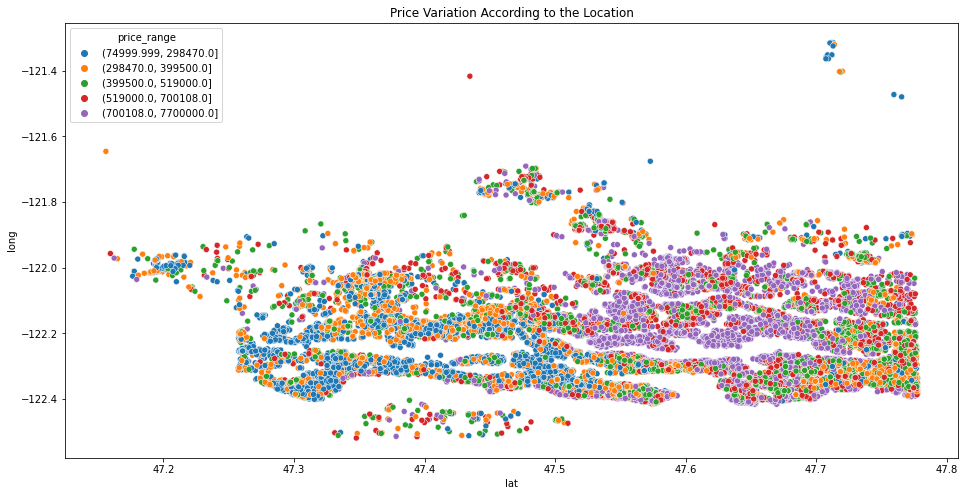

In [104]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df, x='lat',y='long', hue = 'price_range')
plt.title('Price Variation According to the Location')
plt.show()

Parece haver uma região a oeste onde estão concentradas a maior parte das casa com maior faixa de valor

Text(0.5, 0.98, 'Price variation related to number of floors, grade, condition and waterfront')

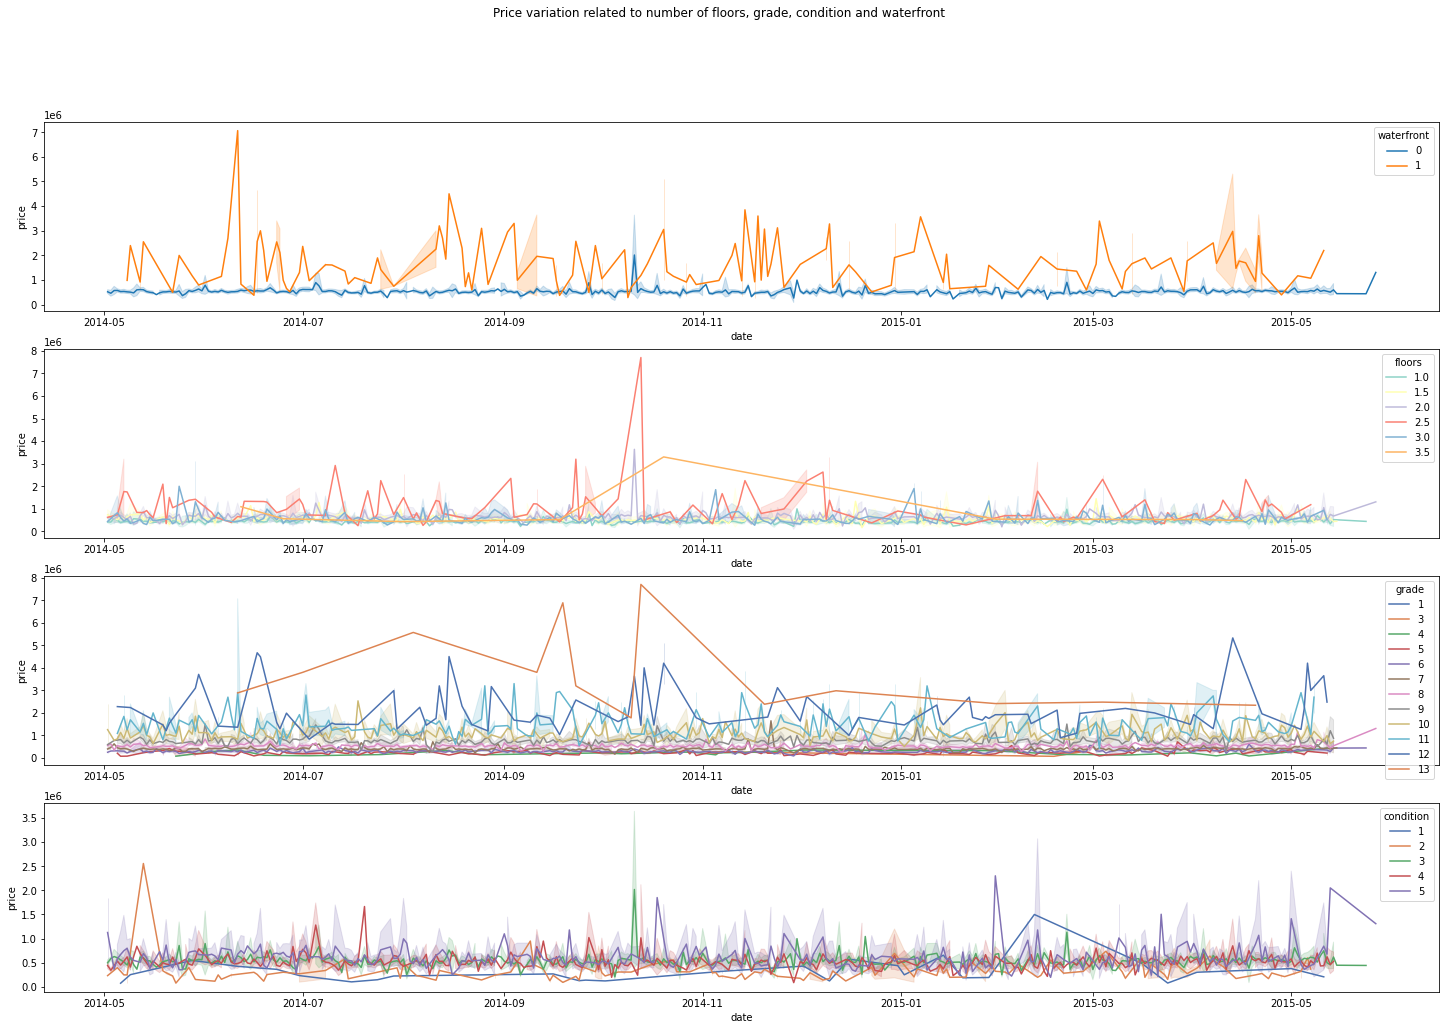

In [87]:
f, ax = plt.subplots(nrows = 4, ncols = 1, figsize=(25,16))


sns.lineplot(x='date', y='price', data = df, hue = 'waterfront', ax=ax[0])
sns.lineplot(x='date', y='price', data = df, hue = 'floors', ax=ax[1], palette = 'Set3')
sns.lineplot(x='date', y='price', data = df, hue = 'grade', ax=ax[2],  palette = 'deep')
sns.lineplot(x='date', y='price', data = df, hue = 'condition', ax=ax[3], palette = 'deep')
plt.suptitle('Price variation related to number of floors, grade, condition and if it is waterfront')

# Correção dos tipos de algumas features

In [26]:
df.drop('id', axis = 1, inplace = True)

In [27]:
df.date = pd.to_datetime(df.date, format = '%Y%m%dT%H%M%S')

In [28]:
df.zipcode = pd.Categorical(df.zipcode)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

## Variação de preços no tempo

In [192]:
avg_month = df[['date', 'price']].set_index('date').resample('M').mean()

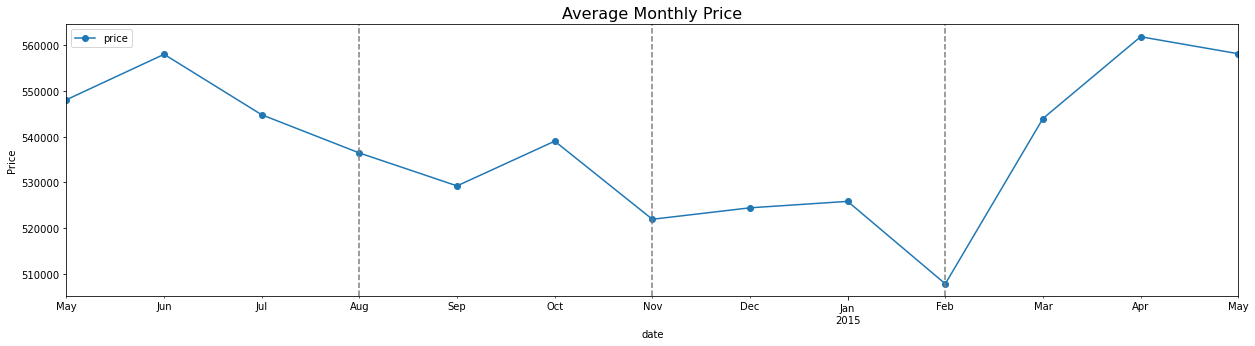

In [232]:
avg_month.plot(figsize = (21,5), marker = 'o')
plt.ylabel('Price')
plt.title('Average Monthly Price', fontsize = 16)
for v in range(3,12,3):
    plt.axvline(avg_month.index[v], color = 'grey', linestyle = '--')

# Correlação entre o preço e demais features

In [240]:
df.corr().iloc[0,:].sort_values(ascending = False)[1:]

sqft_living         0.702035
grade               0.667434
sqft_above          0.605567
sqft_living15       0.585379
bathrooms           0.525138
view                0.397293
sqft_basement       0.323816
bedrooms            0.308350
lat                 0.307003
waterfront          0.266369
floors              0.256794
sqft_livin_base     0.135539
yr_renovated        0.126434
sqft_livin_lot      0.123115
sqft_lot            0.089661
sqft_lot15          0.082447
yr_built            0.054012
condition           0.036362
long                0.021626
sqft_livin_above   -0.135539
Name: price, dtype: float64

O resultado indica que as variáveis que mais afeta o preço final da casa é sua área habitável (sqft_living), condição de preservação das instalações e estrutura (grade) e área acima do nível do solo. É também importante o tamanho das casas próximas à casa em questão (sqft_living15). 

O resultado indica que o tamanho da área habitável, de forma geral, é um dos grandes influenciadores no preço final de compra/venda.

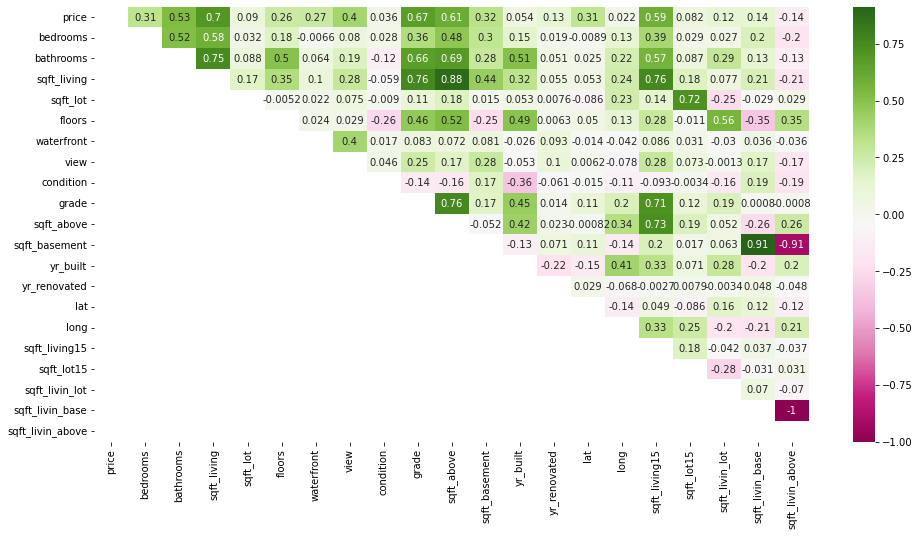

In [230]:
plt.figure(figsize = (16,8))
mask = np.tril(np.ones((df.corr()).shape), 0)
sns.heatmap(df.corr(), annot = True, mask = mask, cmap='PiYG')
plt.show()

In [225]:
df['sqft_livin_lot'] = df.sqft_living/df['sqft_lot']

In [226]:
df['sqft_livin_base'] = df.sqft_basement/df['sqft_living'] #  % de área habitável abaixo do nivel do solo
df['sqft_livin_above'] = df.sqft_above/df['sqft_living']   #  % de área habitável acima do nivel do solo


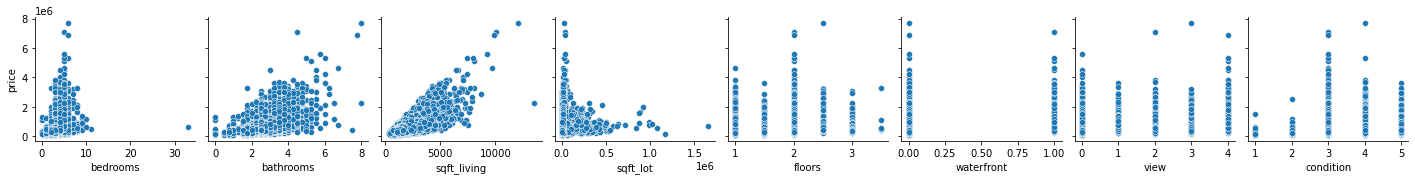

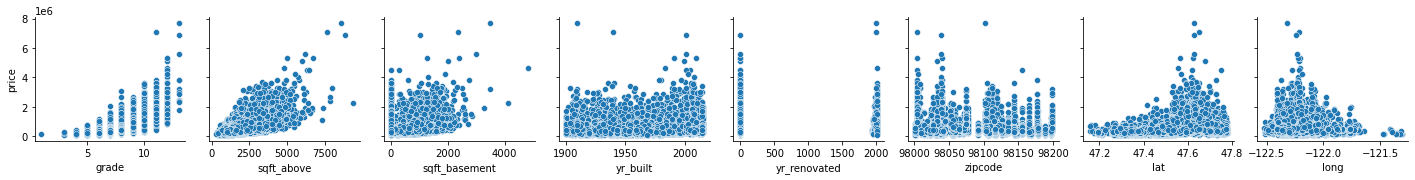

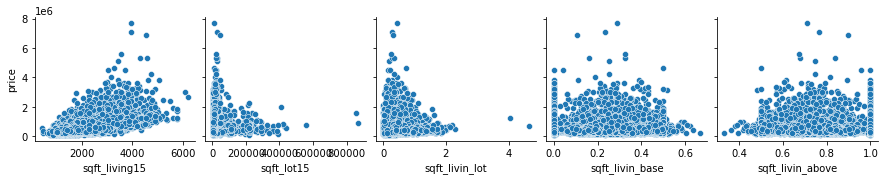

In [231]:
for i in range(2, len(df.columns), 8):
    sns.pairplot(df.drop('price_range',axis = 1), y_vars = 'price', x_vars = df.drop('price_range',axis = 1).columns[i:i+8].values)

Algumas variáveis parecem afetadas pela presença de outliers.

In [156]:
df_numerical = df.drop(['date','waterfront','grade','yr_built','yr_renovated','zipcode','lat','long','price_range', 'view'], axis = 1)

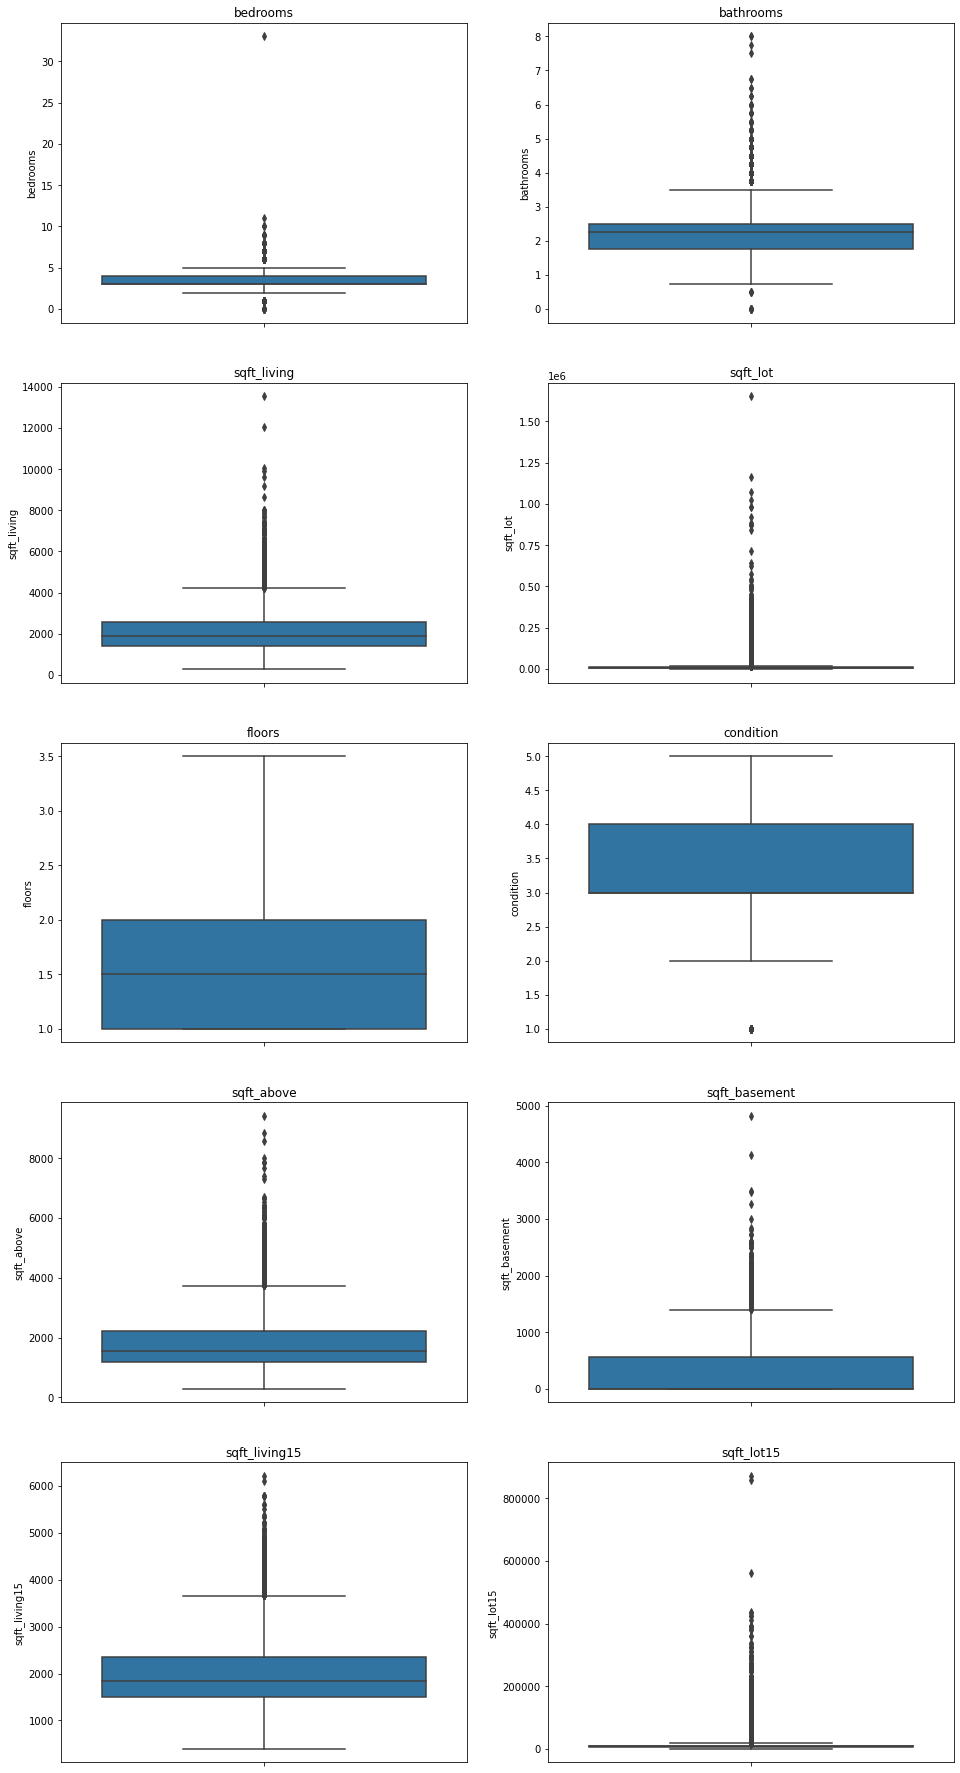

In [161]:
f, ax = plt.subplots(nrows=5, ncols = 2, figsize = (16,32))
rows=0
for i in range(1, len(df_numerical.columns), 2):
    
    ax[rows][0].set_title(df_numerical.columns[i])
    sns.boxplot(data = df_numerical, y=df_numerical.columns[i], ax = ax[rows][0])
    
    ax[rows][1].set_title(df_numerical.columns[i+1])
    sns.boxplot(data = df_numerical, y=df_numerical.columns[i+1], ax = ax[rows][1])
    rows+=1

Os boxplots mostram que algumas variáveis tem poucos valores que se distanciam razoavelmente dos demais. 

Vamos tentar refazer as análises com esses outliers removidos pelo critério de observação dos boxplots

In [238]:
df_or = df[(df.bedrooms <15) & (df.sqft_living < 11000) & (df.sqft_lot < 1250000) & (df.sqft_basement < 4000) & (df.sqft_lot15<500000)]

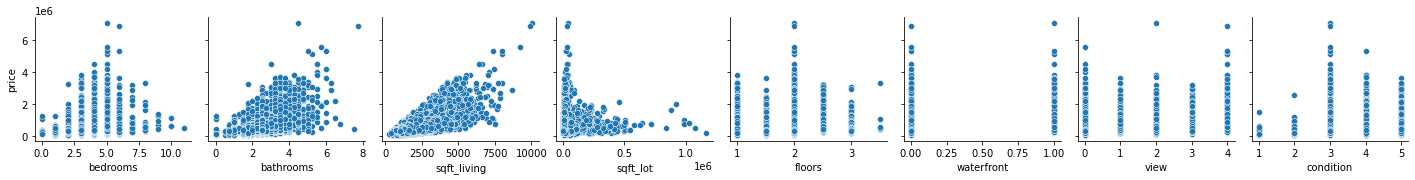

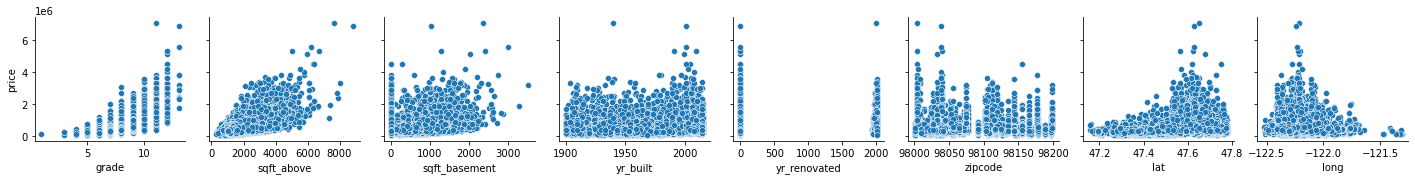

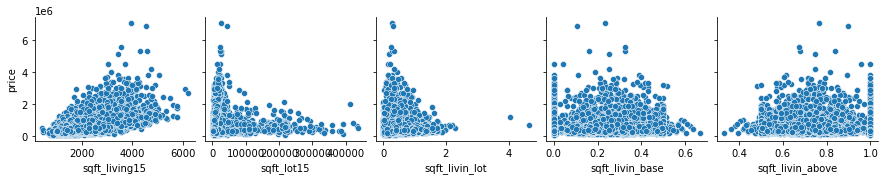

In [239]:
for i in range(2, len(df.columns), 8):
    sns.pairplot(df_or.drop('price_range',axis = 1), y_vars = 'price', x_vars = df_or.drop('price_range',axis = 1).columns[i:i+8].values)